In [29]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from math import sin, cos, exp, pi, log
import math

from keras.layers import Reshape, Dense, Flatten, Input, Conv1D, Conv2D, Conv2DTranspose, Cropping2D, Concatenate, LocallyConnected1D, ZeroPadding2D
from keras.layers.core import Reshape
from keras.models import Sequential, Model
from keras.optimizers import SGD
import keras

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

# Functions
### Function for generating the domain

In [2]:
# Function for generating the domain
 
# Input1: the width of the domain
# Input2: the height of the domain
# Input3: the divison point - the relative height of the full rectangle
# Input4: the border_dist - sets the distance of the border from the cirucmference
# Output: list of the followings:
#    x coordinates of the circumference
#    y coordinates of the circumference
#    x coordinates of the inner domain
#    y coordinates of the inner domain
#    x coordinates of the border
#    y coordinates of the border
#    list of x coordinates of the separated border
#    list of y coordinates of the separated border
#    list of x coordinates of the circumference
#    list of y coordinates of the circumference
#    list of x coordinates of the separated top border
#    list of y coordinates of the separated top border
#    list of x coordinates of the separated top circumference
#    list of y coordinates of the separated top circumference

def rect_circ2(width, height, devision_point, border_dist):
    
    # Creating lists to save the coordinates
    x_coord_circ = []
    y_coord_circ = []
    
    x_filled = []
    y_filled = []
    
    x_border = []
    y_border = []

    # Generating the coordinates
    x_lower_upper = list(np.array(range(int(-width/2*100), int(width/2*100)))/100)
    y_lower = [-height/2]*len(x_lower_upper)
    y_upper = [height/2]*len(x_lower_upper)

    y_left_right = list(np.array(range(int(-height/2*100), int(height/2*100)))/100)
    x_left = [-width/2]*len(y_left_right)
    x_right = [width/2]*len(y_left_right)
    
####################################################################################  
    
    # Generating the circumference
    x_coord_circ += x_lower_upper + x_left + x_right
    y_coord_circ += y_lower + y_left_right + y_left_right
    
    # Generating the upper parts of the domain
    x_temp1 = x_lower_upper[int(len(x_lower_upper)/10*0):int(len(x_lower_upper)/10*2)]
    x_temp3 = x_lower_upper[int(len(x_lower_upper)/10*4):int(len(x_lower_upper)/10*6)]
    x_temp5 = x_lower_upper[int(len(x_lower_upper)/10*8):int(len(x_lower_upper)/10*10)]  
    x_coord_circ += x_temp1 + x_temp3 + x_temp5
    y_temp135 = [height/2]*len(x_temp1)
    y_coord_circ += y_temp135 * 3
    
    # Generating the lower parts of the domain
    x_temp2 = x_lower_upper[int(len(x_lower_upper)/10*2):int(len(x_lower_upper)/10*4)]
    x_temp4 = x_lower_upper[int(len(x_lower_upper)/10*6):int(len(x_lower_upper)/10*8)]
    x_coord_circ += x_temp2 + x_temp4
    y_temp24 = [y_left_right[int(len(y_left_right)*devision_point)]]*len(x_temp2)
    y_coord_circ += y_temp24*2
    
    # Generating the perpendicular parts of the domain
    y_temp1 = y_left_right[int(len(y_left_right)*devision_point):]
    y_coord_circ += y_temp1*4
    x_coord_perp1 = [x_lower_upper[int(len(x_lower_upper)/10*2)]] * len(y_temp1)
    x_coord_perp2 = [x_lower_upper[int(len(x_lower_upper)/10*4)]] * len(y_temp1)
    x_coord_perp3 = [x_lower_upper[int(len(x_lower_upper)/10*6)]] * len(y_temp1)
    x_coord_perp4 = [x_lower_upper[int(len(x_lower_upper)/10*8)]] * len(y_temp1) 
    
    x_coord_circ += x_coord_perp1 + x_coord_perp2 + x_coord_perp3 + x_coord_perp4
    
    x_circ_top_matrix = [x_temp1, x_coord_perp1, x_temp2, x_coord_perp2, x_temp3, x_coord_perp3, x_temp4, x_coord_perp4, x_temp5]
    y_circ_top_matrix = [y_temp135, y_temp1, y_temp24, y_temp1, y_temp135, y_temp1, y_temp24, y_temp1, y_temp135]
    
    # Generating the separate circumference
    x_coord_circumference_sep = [x_left, x_temp1 + x_coord_perp1 + x_temp2 + x_coord_perp2 + x_temp3 + x_coord_perp3 + x_temp4 + x_coord_perp4 + x_temp5, x_right, x_lower_upper]
    y_coord_circumference_sep = [y_left_right, y_temp135 + y_temp1 + y_temp24 + y_temp1 + y_temp135 + y_temp1 + y_temp24 + y_temp1 + y_temp135, y_left_right, y_lower]
    
####################################################################################    
    
    # Generating the outer border - lower and upper
    x_lower_upper_border = list(np.array(range(int((-width-border_dist)/2*200), int((width + border_dist)/2*200)))/200)
    y_lower_border = [(-height - border_dist)/2]*len(x_lower_upper_border)
    y_upper_border = [(height + border_dist)/2]*len(x_lower_upper_border)
    
    # Generating the outer border - left and right
    y_left_right_border = list(np.array(range(int((-height - border_dist)/2*100), int((height + border_dist)/2*100)))/100)
    x_left_border = [(-width - border_dist)/2]*len(y_left_right_border)
    x_right_border = [(width + border_dist)/2]*len(y_left_right_border)
    
    # Generating the outer border - perpendicular
    y_temp_bord = list(np.array(y_left_right[int(len(y_left_right)*devision_point):]) + border_dist/2)
    x_mid_bord1 = [x_lower_upper[int(len(x_lower_upper)/10*2)] + border_dist/2] * len(y_temp_bord)
    x_mid_bord2 = [x_lower_upper[int(len(x_lower_upper)/10*4)] - border_dist/2] * len(y_temp_bord)
    x_mid_bord3 = [x_lower_upper[int(len(x_lower_upper)/10*6)] + border_dist/2] * len(y_temp_bord)
    x_mid_bord4 = [x_lower_upper[int(len(x_lower_upper)/10*8)] - border_dist/2] * len(y_temp_bord)   
    
    # Generating the outer border - upper part
    index_of_temp1 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*2)] + border_dist/2)
    index_of_temp2 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*4)] - border_dist/2)
    index_of_temp3 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*6)] + border_dist/2)
    index_of_temp4 = x_lower_upper_border.index(x_lower_upper[int(len(x_lower_upper)/10*8)] - border_dist/2)
    
    x_upper_bord1 = x_lower_upper_border[0:index_of_temp1+1]
    x_upper_bord2 = x_lower_upper_border[index_of_temp1:index_of_temp2+1]
    x_upper_bord3 = x_lower_upper_border[index_of_temp2:index_of_temp3+1]
    x_upper_bord4 = x_lower_upper_border[index_of_temp3:index_of_temp4+1]
    x_upper_bord5 = x_lower_upper_border[index_of_temp4:]
    x_upper_bord = x_upper_bord1 + x_mid_bord1 + x_upper_bord2 + x_mid_bord2 + x_upper_bord3 + x_mid_bord3 + x_upper_bord4 + x_mid_bord4 + x_upper_bord5
    x_upper_bord_matrix = [x_upper_bord1, x_mid_bord1, x_upper_bord2, x_mid_bord2, x_upper_bord3, x_mid_bord3, x_upper_bord4, x_mid_bord4, x_upper_bord5]
    
    y_upper_border1 = [(height + border_dist)/2]*len(x_upper_bord1)
    y_upper_border2 = [y_left_right[int(len(y_left_right)*devision_point)] + border_dist/2]*len(x_upper_bord2)      
    y_upper_border3 = [(height + border_dist)/2]*len(x_upper_bord3) 
    y_upper_border4 = [y_left_right[int(len(y_left_right)*devision_point)] + border_dist/2]*len(x_upper_bord4)     
    y_upper_border5 = [(height + border_dist)/2]*len(x_upper_bord5)  
    y_upper_border = y_upper_border1 + y_temp_bord + y_upper_border2 + y_temp_bord + y_upper_border3 + y_temp_bord + y_upper_border4 + y_temp_bord + y_upper_border5
    y_upper_bord_matrix = [y_upper_border1, y_temp_bord, y_upper_border2, y_temp_bord, y_upper_border3, y_temp_bord, y_upper_border4, y_temp_bord, y_upper_border5]
    
    # Appending everything to the lists
    x_border += x_left_border + x_upper_bord + x_right_border + x_lower_upper_border
    y_border += y_left_right_border + y_upper_border + y_left_right_border + y_lower_border

    # Appending to the separate borders
    x_sep_borders = [x_left_border, x_upper_bord, x_right_border, x_lower_upper_border]
    y_sep_borders = [y_left_right_border, y_upper_border, y_left_right_border, y_lower_border]
    
####################################################################################    
    
    # Filling up the lower devision_point of the rectangle
    for i in range(1,int(len(y_left_right) * devision_point)-1):
        #appending the x and y coordinates
        x_filled += x_lower_upper[1:-1]
        y_filled += [y_left_right[i]]*len(x_lower_upper[1:-1])
    
    # Filling up the rest of the domain
    for i in range(int(len(y_left_right) * devision_point), len(y_left_right)):        
        temp = x_lower_upper[int(len(x_lower_upper)/10*0)+1:int(len(x_lower_upper)/10*2)-1]      
        x_filled += temp
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*4)+1:int(len(x_lower_upper)/10*6)-1]
        x_filled += x_lower_upper[int(len(x_lower_upper)/10*8)+1:int(len(x_lower_upper)/10*10)-1]
        y_filled += [y_left_right[i]]*len(temp)*3
        
####################################################################################  
    
    # Returning the coordinates
    return [x_coord_circ, y_coord_circ, x_filled, y_filled, x_border, y_border, x_sep_borders, y_sep_borders, x_coord_circumference_sep, y_coord_circumference_sep, x_upper_bord_matrix, y_upper_bord_matrix, x_circ_top_matrix, y_circ_top_matrix]

### Function for plotting the domain

In [3]:
# Function for plotting the domain

# Input1: x coordinates of the circumference
# Input2: y coordinates of the circumference
# Input3: x coordinates of the inner domain
# Input4: y coordinates of the inner domain
# Input5: x coordinates of the border
# Input6: y coordinates of the border
# Input7: savefig boolean - if true, the figure is saved as "domain.jpg"

def rect_plot(border_coord, circum_coord, inner_coord, border_training_coord, circum_training_coord, inner_training_coord, visibility, savefig):

    plt.figure(figsize = (10,10))
    plt.grid()
    
    custom_lines = []
    custom_legend_label = []
    
    if visibility[0] == True:
        plt.scatter(border_coord[0], border_coord[1], color = 'darkred', s = 20)
        custom_lines.append(Line2D([0], [0], color='darkred', lw=5))
        custom_legend_label.append('Border')
    
    if visibility[1] == True:
        plt.scatter(circum_coord[0], circum_coord[1], color = 'firebrick', s = 20)
        custom_lines.append(Line2D([0], [0], color='firebrick', lw=5))
        custom_legend_label.append('Circumference')
        
    if visibility[2] == True:
        plt.scatter(inner_coord[0], inner_coord[1], color = 'lightcoral', s = 5, alpha = 0.01)
        custom_lines.append(Line2D([0], [0], color='lightcoral', lw=5))
        custom_legend_label.append('Domain')
        
    if visibility[3] == True:
        plt.scatter(border_training_coord[0], border_training_coord[1], color = 'gold', s = 30)
        custom_lines.append(Line2D([0], [0], color='gold', lw=5))
        custom_legend_label.append('Border training points')

    if visibility[4] == True:
        plt.scatter(circum_training_coord[0], circum_training_coord[1], color = 'orange', s = 30)
        custom_lines.append(Line2D([0], [0], color='orange', lw=5))
        custom_legend_label.append('Circumference training points')
        
    if visibility[5] == True:
        plt.scatter(inner_training_coord[0], inner_training_coord[1], color = 'orangered', s = 100)
        custom_lines.append(Line2D([0], [0], color='orangered', lw=5))
        custom_legend_label.append('Inner training points')
        

    plt.title('The generated domain with width = ' + str(width) + ', height = ' + str(height), fontsize = 18, y = 1.05)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)    
    plt.legend(custom_lines, custom_legend_label, bbox_to_anchor=(1.05, 1), loc=2, fontsize = 15)
    
    if savefig == True:
        plt.savefig('domain.jpg', dpi = 600, bbox_inches='tight')
    
    plt.show()

### Function for generating the training points

In [4]:
# Function for generating the training points

# Input1: x coordinates to split
# Input2: y coordinates to split
# Input3: number of elements after splitting
# Output: vector containing the separated x and y training coordinates if no error occurred

def evenly_distr_points_gen(x_values_of_side, y_values_of_side, num_of_points, side_str):
    
    if side_str == 'top':
        
        # Creating lists to save the data
        x_sep_training = []
        y_sep_training = []

        # Calculating the distance of the small part / num_of_points
        beginning_temp = np.array([x_values_of_side[2][0], y_values_of_side[2][0]])
        end_temp = np.array([x_values_of_side[2][-1], y_values_of_side[2][-1]])
        dist_et = np.linalg.norm(beginning_temp - end_temp)/(num_of_points+1)
        
        # Iterating through the x and y coordinates and generating the points uniformly according to the lengths
        for j in range(0,len(x_values_of_side)):
            
            #calculating the distances
            beginning_temp = np.array([x_values_of_side[j][0], y_values_of_side[j][0]])
            end_temp = np.array([x_values_of_side[j][-1], y_values_of_side[j][-1]])        
            curr_num_of_points = int(np.linalg.norm(beginning_temp - end_temp)/dist_et)+1
            
            #calculating the indices of the points
            idx = np.round(np.linspace(0, len(x_values_of_side[j]) - 1, curr_num_of_points)).astype(int)
            
            #when i = 1,3,5, the last element shouldn't be added
            if j == 1 or j == 3 or j == 6 or j == 7:
                idx = idx[0:-1]
            elif j == 2 or j == 5:
                idx = idx[1:-1]
                
            #print(len(idx))
                
            #appending the training points
            x_sep_training += list(np.array(x_values_of_side[j])[idx])
            y_sep_training += list(np.array(y_values_of_side[j])[idx])
                                     
    else:
    
        # If the num_of_training_points_to_gen is higher than the length of all points, return error
        if num_of_points > len(x_values_of_side):
            print('The number of training points to generate is higher than all the training points. Please enter a valid number.')
            return()

        # Generating the points uniformly
        idx = np.round(np.linspace(0, len(x_values_of_side) - 1, num_of_points)).astype(int)

        # Selecting the appropriate elements from the vectors
        x_sep_training = np.array(x_values_of_side)[idx]
        y_sep_training = np.array(y_values_of_side)[idx]

        
    # Returning with the new vectors
    return([x_sep_training, y_sep_training])

### Function for generating the inner points

In [5]:
# Function for generating the inner points

# Input1: x coordinates of the inner data
# Input2: y coordinates of the inner data
# Input3: x coordinates of the requested data
# Input4: y coordinates of the requested data

def inner_points_generation(x_filled, y_filled, x_inner_results, y_inner_results):

    # Creating a list to store the found indices
    found_coordinates_index = []

    # Iterating through the given inner points
    for j in range(0,len(x_inner_results)):

        # Boolean for when to stop searching
        searching = True
        # Index of the x_filled and y_filled data
        i = 0

        # Iterating through the x_filled and y_filled data
        while searching == True:

            # If x matches:
            if x_filled[i] == x_inner_results[j]:
                # If y matches:
                if y_filled[i] == y_inner_results[j]:

                    # Saving the index to the list
                    found_coordinates_index.append(i)

                    # Changing the boolean to False, so the while loop stops
                    searching = False

            # Increasing the i index
            i += 1
            
            # Checking if i has a valid value
            if i == len(x_filled)-2:
                print('The requested coordinates are not found.')
                return()
    
    # Returning with the indices
    return found_coordinates_index

### Function for calling the functions and generating the domain

In [6]:
# Function for calling the rect_circ2, evenly_distr_points_gen and inner_points_generation functions
# Calculating the domain 

# Input1: width of the domain
# Input2: height of the domain
# Input3: devision points
# Input4: distance between the circumference and the border
# Input5: string containing the side (bottom, left, top, right)
# Input6: number of training points on the border
# Input7: number of training points on the circumference
# Input8: the x coordinates of the requested inner points
# Input9: the y coordinates of the requested inner points
# Output: x, y coordinates of the following: border-, circumference-, inner-, training border-, training cirum.- training inner coordinates

def calling_circ_training_inner(width, height, devision_point, border_dist, side_str, num_points_to_gen_training_border, num_points_to_gen_training_circum, x_inner_requested, y_inner_requested):

    # Generating the domain 
    x_y_coord = rect_circ2(width, height, devision_point, border_dist)

    # Circumference
    x_coordinates = x_y_coord[0]
    y_coordinates = x_y_coord[1]

    # Inner domain
    x_filled = x_y_coord[2]
    y_filled = x_y_coord[3]

    # Outer border
    x_border = x_y_coord[4]
    y_border = x_y_coord[5]

    # Outer border separated - x coordinates
    x_border_left = x_y_coord[6][0]
    x_border_top = x_y_coord[6][1]
    x_border_right = x_y_coord[6][2]
    x_border_bottom = x_y_coord[6][3]

    # Outer border separated - y coordinates
    y_border_left = x_y_coord[7][0]
    y_border_top = x_y_coord[7][1]
    y_border_right = x_y_coord[7][2]
    y_border_bottom = x_y_coord[7][3]

    # Outer border separated - x coordinates
    x_circum_left = x_y_coord[8][0]
    x_circum_top = x_y_coord[8][1]
    x_circum_right = x_y_coord[8][2]
    x_circum_bottom = x_y_coord[8][3]

    # Outer border separated - y coordinates
    y_circum_left = x_y_coord[9][0]
    y_circum_top = x_y_coord[9][1]
    y_circum_right = x_y_coord[9][2]
    y_circum_bottom = x_y_coord[9][3]

    # Outer top border separated - x and y coordinates
    x_border_top_separated = x_y_coord[10]
    y_border_top_separated = x_y_coord[11]

    # Outer top circumference separated - x and y coordinates
    x_circum_top_separated = x_y_coord[12]
    y_circum_top_separated = x_y_coord[13]
    
####################################################################################    

    # Setting the appropriate vectors
    if side_str == 'left':
        bord_cir_coord_temp = [x_border_left, y_border_left, x_circum_left, y_circum_left]
    elif side_str == 'top':
        bord_cir_coord_temp = [x_border_top_separated, y_border_top_separated, x_circum_top_separated, y_circum_top_separated]
    elif side_str == 'right':
        bord_cir_coord_temp = [x_border_right, y_border_right, x_circum_right, y_circum_right]
    elif side_str == 'bottom':
        bord_cir_coord_temp = [x_border_bottom, y_border_bottom, x_circum_bottom, y_circum_bottom]

    # Calling the evenly distributied points function for the border training points
    x_y_training_border_temp = evenly_distr_points_gen(bord_cir_coord_temp[0], bord_cir_coord_temp[1], num_points_to_gen_training_border, side_str)
    x_training_border = x_y_training_border_temp[0]
    y_training_border = x_y_training_border_temp[1]

    # Calling the evenly distributied points function for the circumference training points
    x_y_training_circum_temp = evenly_distr_points_gen(bord_cir_coord_temp[2], bord_cir_coord_temp[3], num_points_to_gen_training_circum, side_str)
    x_training_circum = x_y_training_circum_temp[0]
    y_training_circum = x_y_training_circum_temp[1]
    
####################################################################################    

    # Calling the inner point generator function to find the appropriate coordinates
    inner_resulted_indeces = inner_points_generation(x_filled, y_filled, x_inner_requested, y_inner_requested)

    # Saving the resulted inner points
    x_inner_training = [x_filled[i] for i in inner_resulted_indeces]
    y_inner_training = [y_filled[i] for i in inner_resulted_indeces]
    
####################################################################################  

    # Returning the matrix of the coordinates
    return [ [x_border, y_border], [x_coordinates, y_coordinates], [x_filled, y_filled], [x_training_border, y_training_border], [x_training_circum, y_training_circum], [x_inner_training, y_inner_training] ]

### Function for calculating the following: $\psi_{y_j}(x)$ = -$\frac{1}{2\pi}\ln(x-y_j)$

In [7]:
# Function for calculating the psi values

# Input1: x and y coordinates of circumference training points
# Input2: x and y coordinates of border training points
# Output: psi values

def psi_calculator(x, y):
    
    # List for saving the x_i values
    psi_values = []
    
    # Iterating through the circumference points
    for j in range(0,len(y[0])):
    
        #declaring variable for saving the psi values for all j
        psi_j = []
        
        #iterating through the border points
        for i in range(0,len(x[0])):
            
            #calculating the distances between the border and circumf. values
            beginning_temp = np.array([x[0][i], x[1][i]])
            end_temp = np.array([y[0][j], y[1][j]])
            dist = np.linalg.norm(beginning_temp - end_temp)           
        
            # calculating the psi values
            psi_j.append(- 1/(2*pi) * log(dist))
        
        #appending the psi values
        psi_values.append(psi_j)
        
    # Returning with the psi matrix
    return psi_values

### Function for calculating the harmonic function: $g(x,y) = (x+5)^2 + (y-2)^2$

In [8]:
# Function for calculating the harmonic function values

# Input1: x coordinates
# Input2: y coordinates
# Output: function values

def harm_func(x_list, y_list):
    
    # Creating list to store the values
    g_values = []
    
    # Looping through the lists
    for i in range(0,len(x_list)):
    
        # calculating the function values
        g_values.append((x_list[i]+5)**2 + (y_list[i]-2)**2)

    # Returning the value
    return g_values

### Function for circular convolutional layer 

In [9]:
def CConv2D(filters, kernel_size, strides=(1, 1), activation='linear', padding='valid', kernel_initializer='glorot_uniform', kernel_regularizer=None):
    def CConv2D_inner(x):
        # padding (see https://www.tensorflow.org/api_guides/python/nn#Convolution)
        in_height = int(x.get_shape()[1])
        in_width = int(x.get_shape()[2])

        if (in_height % strides[0] == 0):
            pad_along_height = max(kernel_size[0] - strides[0], 0)
        else:
            pad_along_height = max(
                kernel_size[0] - (in_height % strides[0]), 0)
        if (in_width % strides[1] == 0):
            pad_along_width = max(kernel_size[1] - strides[1], 0)
        else:
            pad_along_width = max(kernel_size[1] - (in_width % strides[1]), 0)

        pad_top = pad_along_height // 2
        pad_bottom = pad_along_height - pad_top
        pad_left = pad_along_width // 2
        pad_right = pad_along_width - pad_left

        # left and right side for padding
        pad_left = Cropping2D(cropping=((0, 0), (in_width-pad_left, 0)))(x)
        pad_right = Cropping2D(cropping=((0, 0), (0, in_width-pad_right)))(x)

        # add padding to incoming image
        conc = Concatenate(axis=2)([pad_left, x, pad_right])

        # top/bottom padding options
        if padding == 'same':
            conc = ZeroPadding2D(padding={'top_pad': pad_top,
                                          'bottom_pad': pad_bottom})(conc)
        elif padding == 'valid':
            pass
        else:
            raise Exception('Padding "{}" does not exist!'.format(padding))

        # perform the circular convolution
        cconv2d = Conv2D(filters=filters, kernel_size=kernel_size,
                         strides=strides, activation=activation,
                         padding='valid',
                         kernel_initializer=kernel_initializer,
                         kernel_regularizer=kernel_regularizer)(conc)

        # return circular convolution layer
        return cconv2d
    return CConv2D_inner

# Generating the domain

Please set the width, heigth, devision point and border distance in the following cell.\
The side_str variable has four options: top, bottom, left and right.

If the side_str is chosen as 'top', the training data points are located on the top part of both the circumrence and the border. In this case, the num_point_to_gen_training variables set the number of training points between the edges of the lower parts (located at $y = height*devision\_point - height/2)$ of the border and circumference. 

When the side_str variable is chosen anything else, the above mentioned training points correspond to the number of all training points.

In [26]:
# Setting the width and height
width = 10
height = 10

# Setting the division point - the relative height of the full rectangle
devision_point = 1/3

# Setting the border distance
border_dist = width / 10

# Setting the side
# Options: left, top, bottom, right
side_str = 'top'

# Setting the number of training points to generate
# Option1: if side_str is set 'top' the the following variables should be set to determine the training points 
# in the lower part of the top border
# Option2: if the side_str is set as 'left', 'bottom' or 'right', the amount of all training data should be given
num_points_to_gen_training_border = 3
num_points_to_gen_training_circum = 0

# Setting the inner points for the NN
# Give the following coordinates as floating number
# One digit (if it's and integer or has only one digit), two digits (if it has two or more digits)
x_inner_requested = [-3.0,  0.0,  3.0]
y_inner_requested = [-3.0, -3.0, -3.0]

In [11]:
# Calling the calling_circ_training_inner function
results_temp = calling_circ_training_inner(width, height, devision_point, border_dist, side_str, num_points_to_gen_training_border, num_points_to_gen_training_circum, x_inner_requested, y_inner_requested)

# Putting the coordinates into lists
border_coord = results_temp[0]
circum_coord = results_temp[1]
inner_coord = results_temp[2]
border_training_coord = results_temp[3]
circum_training_coord = results_temp[4]
inner_training_coord = results_temp[5]

### Plotting the domain

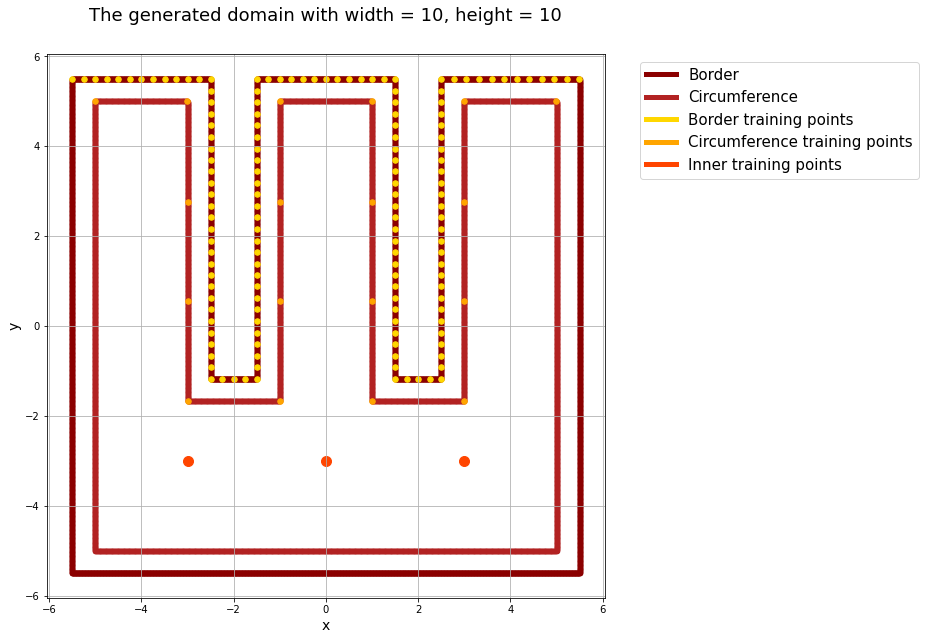

In [12]:
# Setting the visibility of the border, circumference and inner points
border_vis = True
circum_vis = True
inner_vis = False
border_training_vis = True
circum_training_vis = True
inner_training_vis = True

# Setting the savefig variable
savefig = False

# Setting the visibility boolean list
visibility = [border_vis, circum_vis, inner_vis, border_training_vis, circum_training_vis, inner_training_vis]

# Plotting the domain
rect_plot(border_coord, circum_coord, inner_coord, border_training_coord, circum_training_coord, inner_training_coord, visibility, savefig)

# Creating the Neural Network

In [13]:
# Calling the domain generation - all sides

border_training_coord_all_x = []
border_training_coord_all_y = []
circum_training_coord_all_x = []
circum_training_coord_all_y = []

results_top = calling_circ_training_inner(width, height, devision_point, border_dist, 'top', 3, 0, x_inner_requested, y_inner_requested)
border_training_coord_all_x += list(results_top[3][0])
border_training_coord_all_y += list(results_top[3][1])
circum_training_coord_all_x += list(results_top[4][0])
circum_training_coord_all_y += list(results_top[4][1])

results_bottom = calling_circ_training_inner(width, height, devision_point, border_dist, 'bottom', 40, 10, x_inner_requested, y_inner_requested)
border_training_coord_all_x += list(results_bottom[3][0])
border_training_coord_all_y += list(results_bottom[3][1])
circum_training_coord_all_x += list(results_bottom[4][0])
circum_training_coord_all_y += list(results_bottom[4][1])

results_left = calling_circ_training_inner(width, height, devision_point, border_dist, 'left', 40, 10, x_inner_requested, y_inner_requested)
border_training_coord_all_x += list(results_left[3][0])
border_training_coord_all_y += list(results_left[3][1])
circum_training_coord_all_x += list(results_left[4][0])
circum_training_coord_all_y += list(results_left[4][1])

results_right = calling_circ_training_inner(width, height, devision_point, border_dist, 'right', 40, 10, x_inner_requested, y_inner_requested)
border_training_coord_all_x += list(results_right[3][0])
border_training_coord_all_y += list(results_right[3][1])
circum_training_coord_all_x += list(results_right[4][0])
circum_training_coord_all_y += list(results_right[4][1])

In [33]:
# Calling the psi calculator function
psi_training_input = psi_calculator([circum_training_coord_all_x, circum_training_coord_all_y], [border_training_coord_all_x, border_training_coord_all_y])
psi_training_output = psi_calculator([x_inner_requested, y_inner_requested], [border_training_coord_all_x, border_training_coord_all_y])

# Scaling the input
psi_training_input = np.array(preprocessing.scale(psi_training_input))

# Calling the harmonic function value calculator
harm_function_values_circum = np.array(harm_func(circum_training_coord_all_x, circum_training_coord_all_y))
harm_function_values_inner = np.array(harm_func(x_inner_requested, y_inner_requested))

In [34]:
#taking first and last columns
inp0 = np.transpose([psi_training_input[:,0]])
inpm1 = np.transpose([psi_training_input[:,-1]])
#taking also second and before last
inp1 = np.transpose([psi_training_input[:,1]])
inpm2 = np.transpose([psi_training_input[:,-2]])

# Appending the -2nd, -1st, 1st and 2nd elements for periodicity
# Expanding the dimensions
harm_function_values_circum = np.hstack((harm_function_values_circum[-2], harm_function_values_circum[-1], harm_function_values_circum, harm_function_values_circum[0], harm_function_values_circum[1]))
ext_harm_function_values_circum = np.expand_dims(harm_function_values_circum, axis = 0)
ext_harm_function_values_circum = np.expand_dims(ext_harm_function_values_circum, axis = 2)

#glue them to the original data to make it "periodic"
psi_training_input = np.hstack((inpm2, inpm1, psi_training_input, inp0, inp1))


psi_training_input=np.array(psi_training_input).reshape(np.shape(psi_training_input)[0], np.shape(psi_training_input)[1], 1)
psi_training_output=np.array(psi_training_output).reshape(np.shape(psi_training_output)[0], np.shape(psi_training_output)[1])


# Splitting the input into train and test data sets

psi_training_input_train = train_test_split(psi_training_input, train_size = 0.9, test_size= 0.1, random_state = 0)[0]
psi_training_input_test = train_test_split(psi_training_input, train_size = 0.9, test_size= 0.1, random_state = 0)[1]
psi_training_output_train = train_test_split(psi_training_output, train_size = 0.9, test_size= 0.1, random_state = 0)[0]
psi_training_output_test = train_test_split(psi_training_output, train_size = 0.9, test_size= 0.1, random_state = 0)[1]

#print(np.shape(ext_psi_training_input))
print('Shape of the input data set: ', np.shape(psi_training_input))
print('Shape of the output data set: ', np.shape(psi_training_output))

print('Shape of the input train data set: ', np.shape(psi_training_input_train))
print('Shape of the output test data set: ', np.shape(psi_training_output_test))

Shape of the input data set:  (268, 52, 1)
Shape of the output data set:  (268, 3)
Shape of the input train data set:  (241, 52, 1)
Shape of the output test data set:  (27, 3)


In [48]:
# Creating the NN model
model = Sequential()
#model.add(Reshape((48, 1), input_shape=(48, )))
#model.add(Dense(48, activation = None))
#model.add(CConv2D(1, (1, 3), strides=(1, 1)))

#### itt csak egyetlen, viszont helytől függő konvolúciós ablakot használunk  ##############x
#model.add(LocallyConnected1D(1,3,activation='relu',input_shape=(52, 1)))
#model.add(LocallyConnected1D(1,3,activation='relu'))
#### csak 1 plusz réteggel: 339 paraméter, 0.84 körüli accuracy  (ekkor input shape=(50,1))#############
####  plusz 2 réteggel: 539 paraméter, 0.6 körüli accuracy  #############

### itt két különböző, de rögzített konvolúciós ablakot alkalmazunk  ##########
model.add(Conv1D(2, 3, activation='relu',input_shape=(52, 1)))
model.add(Conv1D(2, 3, activation='relu'))    
####  csak plusz 1 réteggel: 299 paraméter, 0.9 körüli accuracy  (ekkor input shape=(50,1))#############
####  plusz 2 réteggel: 313 paraméter, 0.92 körüli accuracy -- ADAM-mal a legjobb #############



model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))

model.summary()

# Compiling the model
opt = SGD(lr=0.1, momentum=0.9)
#opt = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.99, beta_2=0.95, amsgrad=False)
model.compile(optimizer=opt, loss='MAE', metrics=['accuracy'])

# Calling the model
history = model.fit(psi_training_input_train, psi_training_output_train, epochs=300, batch_size=32, validation_data=(psi_training_input_test, psi_training_output_test), verbose=0)
#model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 50, 2)             8         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 48, 2)             14        
_________________________________________________________________
flatten_6 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 291       
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


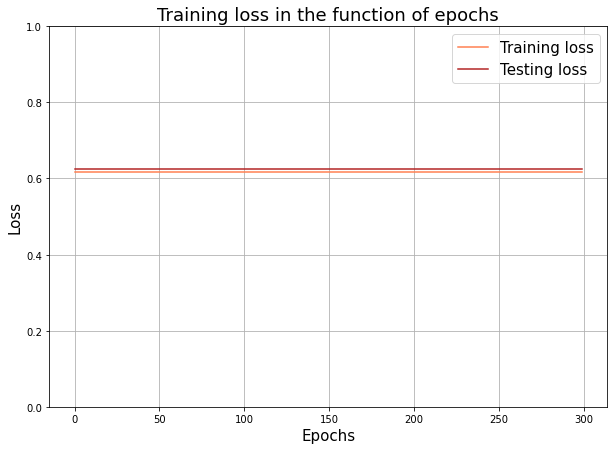

In [49]:
plt.figure(figsize = (10,7))

plt.plot(history.history['loss'], color = 'coral', label = 'Training loss')
plt.plot(history.history['val_loss'], color = 'firebrick', label = 'Testing loss')

plt.title('Training loss in the function of epochs', fontsize = 18)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)

plt.ylim(0,1)

plt.legend(fontsize = 15,)
plt.grid()
plt.show()

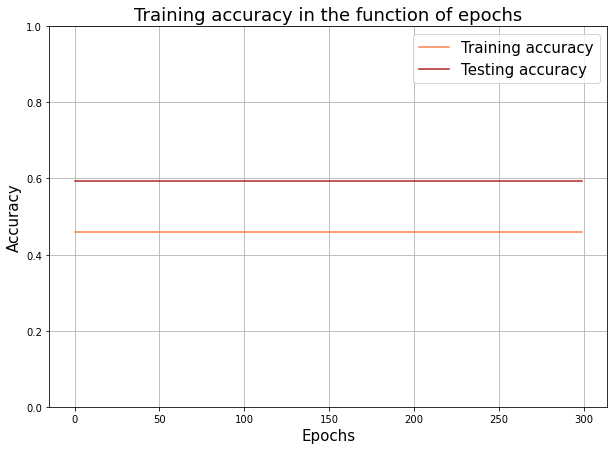

In [50]:
plt.figure(figsize = (10,7))

plt.plot(history.history['accuracy'], color = 'coral', label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], color = 'firebrick', label = 'Testing accuracy')

plt.title('Training accuracy in the function of epochs', fontsize = 18)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

plt.ylim(0,1)

plt.legend(fontsize = 15,)
plt.grid()
plt.show()

In [40]:
model.predict(psi_training_input_test)

array([[0.31218666, 0.35145572, 0.33635762],
       [0.3128769 , 0.33268797, 0.3544351 ],
       [0.31991732, 0.35076812, 0.3293146 ],
       [0.29429117, 0.36220855, 0.34350032],
       [0.2594819 , 0.35559824, 0.38491988],
       [0.41740116, 0.33207202, 0.25052688],
       [0.35215482, 0.3324318 , 0.3154134 ],
       [0.34925646, 0.3436183 , 0.30712524],
       [0.39545023, 0.34941038, 0.25513944],
       [0.35389376, 0.33665025, 0.309456  ],
       [0.3630003 , 0.3547367 , 0.28226298],
       [0.29266673, 0.33106393, 0.37626937],
       [0.31745738, 0.3395854 , 0.34295726],
       [0.33342224, 0.3428258 , 0.32375193],
       [0.23659475, 0.3182426 , 0.44516268],
       [0.38181522, 0.33520725, 0.28297755],
       [0.42706904, 0.32442743, 0.24850348],
       [0.23811558, 0.3542761 , 0.40760836],
       [0.33331776, 0.33618176, 0.3305005 ],
       [0.31167504, 0.34124103, 0.34708393],
       [0.30933765, 0.3440112 , 0.34665114],
       [0.36834326, 0.33537638, 0.29628035],
       [0.

In [41]:
psi_training_output_test

array([[-0.29259522, -0.24422965, -0.24422965],
       [-0.37742373, -0.3411623 , -0.30931115],
       [-0.35306547, -0.34087699, -0.34720436],
       [-0.26230383, -0.17493795, -0.17493795],
       [-0.28373099, -0.19764986, -0.15036121],
       [-0.14926639, -0.2329407 , -0.30941752],
       [-0.34213377, -0.36457875, -0.39304655],
       [-0.294427  , -0.294427  , -0.32372447],
       [-0.1388585 , -0.19590179, -0.2845585 ],
       [-0.34087699, -0.35306547, -0.37724296],
       [-0.17493795, -0.17493795, -0.26230383],
       [-0.38512365, -0.35298972, -0.32637216],
       [-0.36843278, -0.34720436, -0.34087699],
       [-0.32318959, -0.32318959, -0.34468209],
       [-0.34264297, -0.27610945, -0.16672909],
       [-0.26186541, -0.3126685 , -0.36057429],
       [-0.18550959, -0.28129496, -0.34493199],
       [-0.28205253, -0.18800656, -0.12175221],
       [-0.34994438, -0.34060211, -0.34994438],
       [-0.37557797, -0.35186919, -0.34071132],
       [-0.32372447, -0.294427  , -0.294